<a href="https://colab.research.google.com/github/Valespace2302/Proyecto_Progra2_Gearbox_2/blob/main/Gearbox_Fault_Detection_Dataset_%E2%80%93_PHM_2009_(NASA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
data = pd.read_csv('/content/Run_9.csv', header=None)

print("Dimensión del archivo:", data.shape)
print(data.head())


Dimensión del archivo: (133328, 3)
          0         1         2
0  0.011902  0.001679  0.063477
1  0.012512  0.000153  0.061035
2  0.014801 -0.000610  0.057373
3  0.015106 -0.000916  0.057373
4  0.015106  0.000153  0.050049


In [11]:
data.columns = ['sensor1', 'sensor2', 'sensor3']
print(data.head())


    sensor1   sensor2   sensor3
0  0.011902  0.001679  0.063477
1  0.012512  0.000153  0.061035
2  0.014801 -0.000610  0.057373
3  0.015106 -0.000916  0.057373
4  0.015106  0.000153  0.050049


In [13]:
signal = data['sensor1']


In [14]:
signal = signal.dropna()
print("Cantidad de datos:", len(signal))


Cantidad de datos: 133328


In [15]:
clean_data = pd.DataFrame(signal)
clean_data.to_csv('clean_signal.csv', index=False)
print("Archivo clean_signal.csv guardado ✔")


Archivo clean_signal.csv guardado ✔


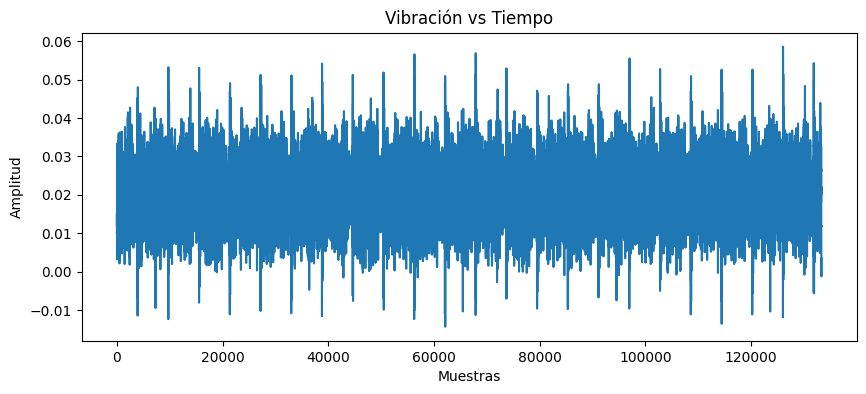

In [16]:
plt.figure(figsize=(10,4))
plt.plot(signal)
plt.title("Vibración vs Tiempo")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.show()


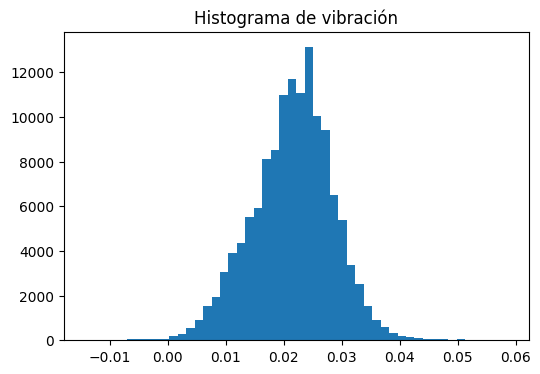

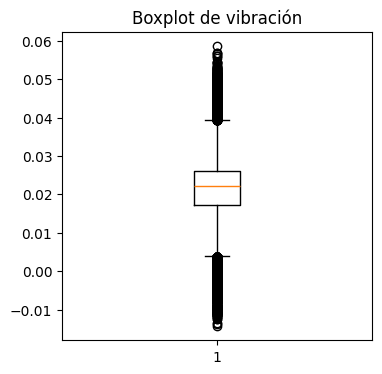

In [17]:
plt.figure(figsize=(6,4))
plt.hist(signal, bins=50)
plt.title("Histograma de vibración")
plt.show()

plt.figure(figsize=(4,4))
plt.boxplot(signal)
plt.title("Boxplot de vibración")
plt.show()


In [18]:
fs = 1000      # frecuencia de muestreo (Hz)
w_sec = 1     # ventana de 1 segundo
N = fs * w_sec

features = []

for i in range(0, len(signal)-N, N):
    window = signal.iloc[i:i+N]
    mean = window.mean()
    std = window.std()
    rms = np.sqrt(np.mean(window**2))
    peak = window.max()
    features.append([mean, std, rms, peak])

feat_df = pd.DataFrame(features, columns=['mean','std','rms','peak'])
feat_df.head()


,mean,std,rms,peak
0,0.021492,0.007346,0.022712,0.036469
1,0.021009,0.006326,0.021940,0.037689
2,0.021811,0.007212,0.022971,0.042725
3,0.021523,0.006730,0.022549,0.048065
4,0.021982,0.007403,0.023194,0.041199


In [19]:
# Tomamos las primeras 20 ventanas como estado normal
baseline = feat_df['rms'][:20].mean()
threshold = baseline * 1.5

feat_df['flag_anom'] = feat_df['rms'] > threshold

print("Umbral:", threshold)
print("Porcentaje fuera de rango:",
      feat_df['flag_anom'].mean()*100, "%")


Umbral: 0.033976788758324515
Porcentaje fuera de rango: 0.0 %


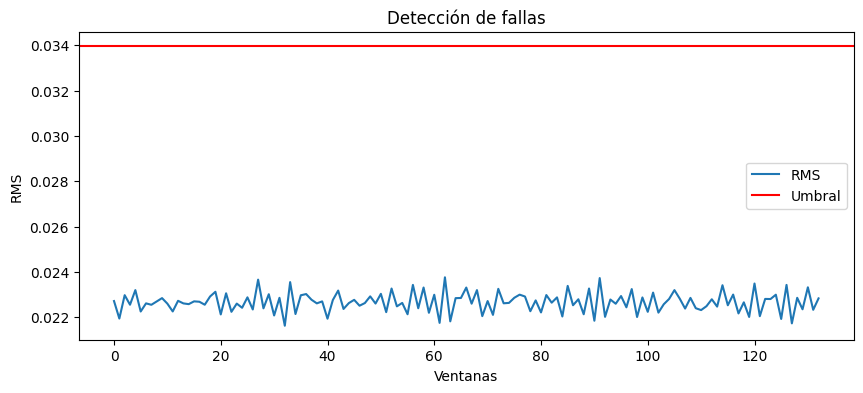

In [20]:
plt.figure(figsize=(10,4))
plt.plot(feat_df['rms'], label='RMS')
plt.axhline(threshold, color='red', label='Umbral')
plt.legend()
plt.title("Detección de fallas")
plt.xlabel("Ventanas")
plt.ylabel("RMS")
plt.show()


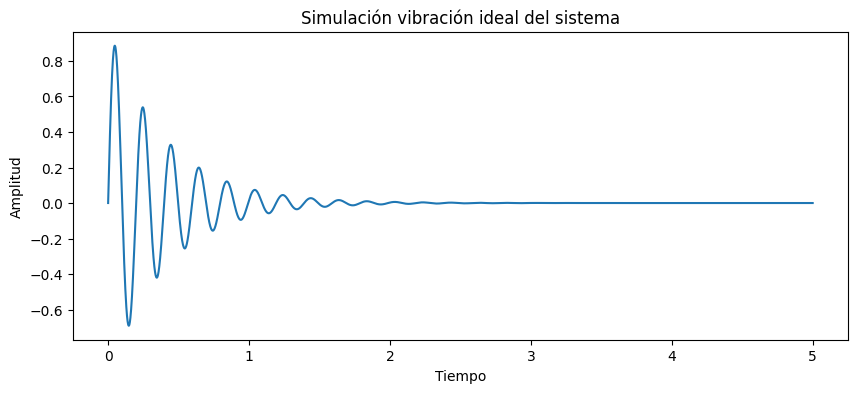

In [21]:
# Sistema masa-resorte-amortiguador simple

m = 1       # masa
k = 1000    # rigidez
c = 5       # amortiguamiento

t = np.linspace(0, 5, 5000)
x = np.exp(-c/(2*m)*t) * np.sin(np.sqrt(k/m)*t)

plt.figure(figsize=(10,4))
plt.plot(t, x)
plt.title("Simulación vibración ideal del sistema")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.show()


In [22]:
!mkdir data


In [23]:
!mv Run_*.csv data/
